In [1]:
import pandas
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

##### Reads database from .xlsx document taken from official web-site of Ukrainian National Bank (https://bank.gov.ua/ua/markets/exchangerate-chart). The file shows the USD exchange rate against the UAH from 01/10/2017 to 07/10/20.<br> Document was preprocessed and modified according to current research needs.

In [2]:
rates = pandas.read_excel("usd_rate.xlsx")

In [3]:
rates.head()

,nominal,data,rate,cdx
0,1,10.01.2017,27.020929,USD
1,1,11.01.2017,27.186833,USD
2,1,12.01.2017,27.113199,USD
3,1,13.01.2017,27.251629,USD
4,1,14.01.2017,27.251629,USD


##### Plot shows distribution of nominal values of dollar rate (column: rate)

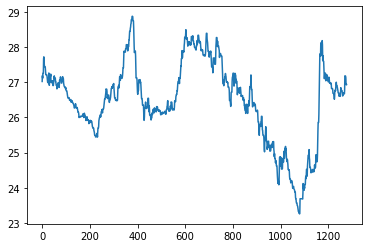

In [4]:
rates.rate.plot()

##### Builds model to predict rate for the next n days (n -> variable future) using m last days (m -> variable past)

In [5]:
past = 60
future = 14

In [6]:
# Forms values for creating X and Y prediction sets
start = past # last m days
end = len(rates.rate) - future # all days except last n

In [7]:
# Length of distribution
end-start

1204

##### Forms columns for dataframe


In [8]:
dataframe = []
for day in range(start, end):
    past_data = list(rates.rate[(day-past):day])
    future_data = list(rates.rate[day:day+future])
    dataframe.append(past_data+future_data)

In [9]:
past_columns = []
for i in range(past):
    past_columns.append(f"p_{i}") # p - past

In [10]:
future_columns = []
for i in range(future):
    future_columns.append(f"f_{i}") # f - future

In [11]:
usd = pandas.DataFrame(dataframe, columns=past_columns+future_columns)

In [12]:
X = usd[past_columns] # input data, basis on which model tries to make a prediction
Y = usd[future_columns] # output data, which model predcits

##### Division on train and test sets 

In [13]:
X_train = X[:-10] 
Y_train = Y[:-10] 

In [14]:
X_test = X[-10:] 
Y_test = Y[-10:] 

In [15]:
linreg = RandomForestRegressor() # Creating RandomForestRegressor model

In [16]:
linreg.fit(X_train, Y_train) # fit regressor's parameters for train sets

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
X_test

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_50,p_51,p_52,p_53,p_54,p_55,p_56,p_57,p_58,p_59
1194,27.2022,27.2022,27.2022,27.0774,27.0815,27.0536,27.0137,27.0137,27.0137,27.1441,...,26.6953,26.6953,26.6005,26.6412,26.6367,26.5999,26.5999,26.5999,26.7303,26.8440
1195,27.2022,27.2022,27.0774,27.0815,27.0536,27.0137,27.0137,27.0137,27.1441,27.1025,...,26.6953,26.6005,26.6412,26.6367,26.5999,26.5999,26.5999,26.7303,26.8440,26.7424
1196,27.2022,27.0774,27.0815,27.0536,27.0137,27.0137,27.0137,27.1441,27.1025,27.0485,...,26.6005,26.6412,26.6367,26.5999,26.5999,26.5999,26.7303,26.8440,26.7424,26.7760
1197,27.0774,27.0815,27.0536,27.0137,27.0137,27.0137,27.1441,27.1025,27.0485,26.9714,...,26.6412,26.6367,26.5999,26.5999,26.5999,26.7303,26.8440,26.7424,26.7760,26.7633
1198,27.0815,27.0536,27.0137,27.0137,27.0137,27.1441,27.1025,27.0485,26.9714,26.9714,...,26.6367,26.5999,26.5999,26.5999,26.7303,26.8440,26.7424,26.7760,26.7633,26.7633
1199,27.0536,27.0137,27.0137,27.0137,27.1441,27.1025,27.0485,26.9714,26.9714,26.9714,...,26.5999,26.5999,26.5999,26.7303,26.8440,26.7424,26.7760,26.7633,26.7633,26.7633
1200,27.0137,27.0137,27.0137,27.1441,27.1025,27.0485,26.9714,26.9714,26.9714,26.9714,...,26.5999,26.5999,26.7303,26.8440,26.7424,26.7760,26.7633,26.7633,26.7633,26.7207
1201,27.0137,27.0137,27.1441,27.1025,27.0485,26.9714,26.9714,26.9714,26.9714,26.9592,...,26.5999,26.7303,26.8440,26.7424,26.7760,26.7633,26.7633,26.7633,26.7207,26.6695
1202,27.0137,27.1441,27.1025,27.0485,26.9714,26.9714,26.9714,26.9714,26.9592,26.9749,...,26.7303,26.8440,26.7424,26.7760,26.7633,26.7633,26.7633,26.7207,26.6695,26.6078
1203,27.1441,27.1025,27.0485,26.9714,26.9714,26.9714,26.9714,26.9592,26.9749,26.9774,...,26.8440,26.7424,26.7760,26.7633,26.7633,26.7633,26.7207,26.6695,26.6078,26.6509


## RandomForestRegressor based prediction 

##### Select one row for RandomForestRegressor and make prediction on it to count absolute error

In [18]:
firstDay = X_test.head(1)

In [19]:
firstDayReal = Y_test.head(1)

In [20]:
firstDay

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_50,p_51,p_52,p_53,p_54,p_55,p_56,p_57,p_58,p_59
1194,27.2022,27.2022,27.2022,27.0774,27.0815,27.0536,27.0137,27.0137,27.0137,27.1441,...,26.6953,26.6953,26.6005,26.6412,26.6367,26.5999,26.5999,26.5999,26.7303,26.844


In [21]:
prediction = linreg.predict(firstDay)

In [22]:
prediction

array([[26.7804346 , 26.77879092, 26.78662134, 26.79251397, 26.80070681,
        26.79272647, 26.78346273, 26.76927726, 26.74447477, 26.73203368,
        26.70837129, 26.69843088, 26.68991801, 26.68938938]])

In [23]:
firstDayReal

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13
1194,26.7424,26.776,26.7633,26.7633,26.7633,26.7207,26.6695,26.6078,26.6509,26.7002,26.7002,26.7002,26.7002,26.6922


##### Mean absolute error value for RFR model

In [24]:
mean_absolute_error(prediction[0], firstDayReal.iloc[0])

0.044762540714291026

##### Dependence plot of predicted and real values

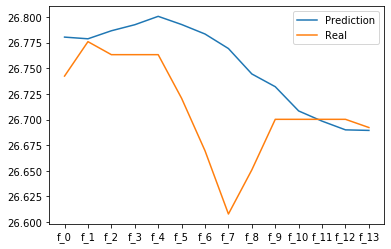

In [25]:
plt.plot(prediction[0], label="Prediction")
plt.plot(firstDayReal.iloc[0], label="Real")
plt.legend()

MAE = 0.04245508499999876


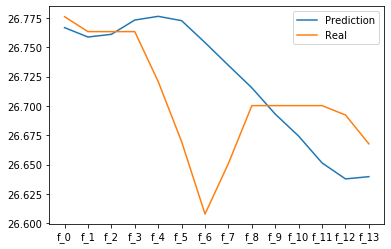

In [26]:
# Changes prediction set to build a model with different parameters
prediction = linreg.predict([X_test.iloc[1]])
real = Y_test.iloc[1]
mae = mean_absolute_error(prediction[0], real)
print(f"MAE = {mae}")
plt.plot(prediction[0], label="Prediction")
plt.plot(real, label="Real")
plt.legend()

## KNeighborsRegressor based prediction 
##### Do the same list of steps as for RFR

In [27]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

MAE = 0.02789642857142814


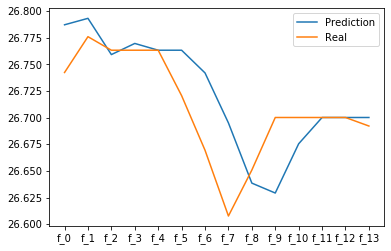

In [28]:
prediction = knn.predict([X_test.iloc[0]])
real = Y_test.iloc[0]
mae = mean_absolute_error(prediction[0], real)
print(f"MAE = {mae}")
plt.plot(prediction[0], label="Prediction")
plt.plot(real, label="Real")
plt.legend()

## MLPRegressor based prediction 
##### Do the same list of steps as for RFR

In [29]:
mlp = MLPRegressor(max_iter=1000, hidden_layer_sizes=(100,100,100), random_state=42)

In [30]:
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

MAE = 0.05337859773195649


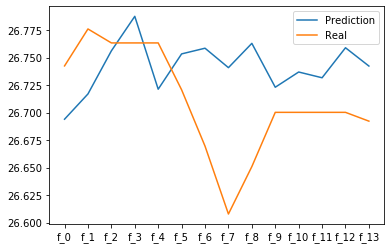

In [31]:
prediction = mlp.predict([X_test.iloc[0]])
real = Y_test.iloc[0]
mae = mean_absolute_error(prediction[0], real)
print(f"MAE = {mae}")
plt.plot(prediction[0], label="Prediction")
plt.plot(real, label="Real")
plt.legend()